In [26]:
import networkx as nx
import csv
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [257]:
network = nx.DiGraph() 
with open("data/nodes_motifs.csv", "r") as nodes, open("data/edges.csv", "r") as edges:
    reader = csv.reader(nodes, delimiter='\t')
    next(reader, None) # skip header
    for row in reader:
        network.add_node(row[0],
                         name=row[1],
                         popularity=row[2],
                         modclass=row[3],
                         rol=row[4],
                         bc=row[5]
                        )
    reader = csv.reader(edges, delimiter=';')
    next(reader, None)
    for source, target in reader:
        network.add_edge(source, target)

In [7]:
from src.motifs.calculos import significance_profile, calcular_motifs
from src.motifs.load import MOTIF_DIR_2, MOTIF_DIR_3
MAX_MOTIFS = 3 

In [4]:
motifs_G = calcular_motifs(network, MAX_MOTIFS)

In [48]:
green_spotify = "#1DB954"
black_spotify = "#121212"

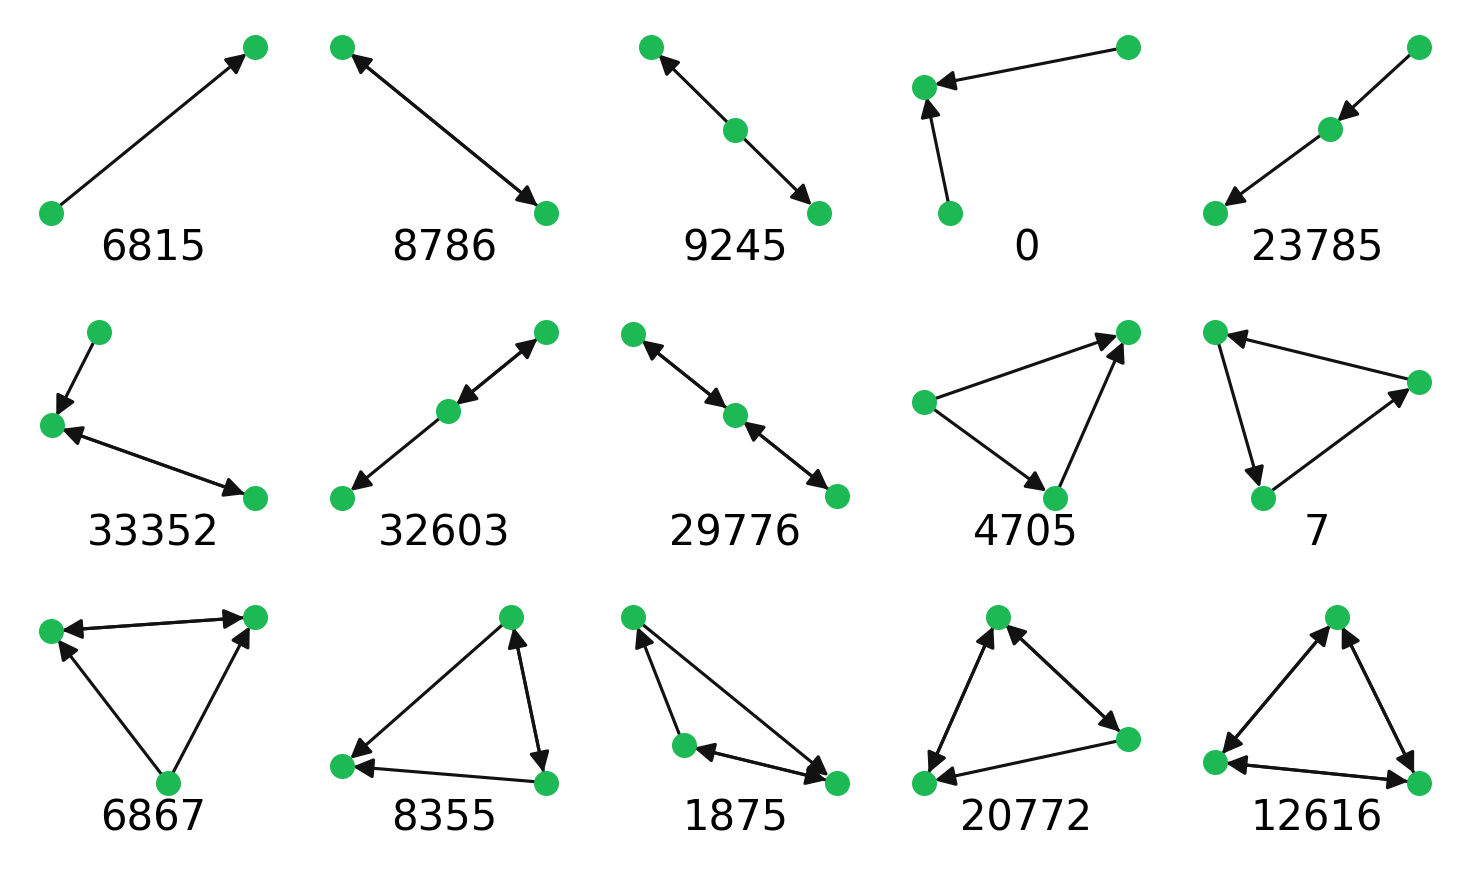

In [69]:
I = 3
J = 5
fig, axes = plt.subplots(nrows=I, ncols=J, dpi=300, figsize=(5, 3))
gs = MOTIF_DIR_2() + MOTIF_DIR_3()
for i in range(I):
    for j in range(J):
        ax = axes[i][j]
        g = gs[i*J+j]
        n = motifs_G[i*J+j]
        nx.draw(g, ax=ax, node_size=25, node_color=green_spotify, width=0.75, edge_color=black_spotify)
        ax.annotate(n, xy=(0.5, -0.15), xycoords='axes fraction', ha="center")
fig.tight_layout()

# ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
#             size=15,
#             bbox=bbox_props)


In [206]:
def make_name2(x,y):
    return f"{min(x,y)}{max(x,y)}"

def make_name3(x,y,z):
    if x == min(x,y,z):
        return x + make_name2(y, z)
    elif y == min(x,y,z):
        return y + make_name2(x, z)
    return z + make_name2(x, y)

all_subgraph = {}
i = 0
for x in network.nodes:
    for y in network.neighbors(x):
        for z in network.nodes:
            i+=1
            if x == z or y == z:
                continue
            sg = [x,y,z]
            name = make_name3(x,y,z)
            if name in all_subgraph:
                continue
            if nx.is_weakly_connected(network.subgraph(sg)):
                all_subgraph[name] = sg
            if i%500000 == 0:
                print(f"Processing {i}/{76500000} graph")
i = 0
for x in network.nodes:
    for y in network.neighbors(x):
        i+=1
        if x == y:
            continue
        name = make_name2(x,y)
        sg = [x,y]
        if name in all_subgraph:
            continue
        all_subgraph[name] = sg

        if i%1000 == 0:
            print(f"Processing {i}/{20*2024} graph")

Processing 500000/76500000 graph
Processing 1000000/76500000 graph
Processing 1500000/76500000 graph
Processing 2000000/76500000 graph
Processing 2500000/76500000 graph
Processing 3000000/76500000 graph
Processing 3500000/76500000 graph
Processing 4000000/76500000 graph
Processing 4500000/76500000 graph
Processing 5000000/76500000 graph
Processing 5500000/76500000 graph
Processing 6000000/76500000 graph
Processing 6500000/76500000 graph
Processing 7000000/76500000 graph
Processing 7500000/76500000 graph
Processing 8000000/76500000 graph
Processing 8500000/76500000 graph
Processing 9000000/76500000 graph
Processing 9500000/76500000 graph
Processing 10000000/76500000 graph
Processing 10500000/76500000 graph
Processing 11000000/76500000 graph
Processing 11500000/76500000 graph
Processing 12000000/76500000 graph
Processing 12500000/76500000 graph
Processing 13000000/76500000 graph
Processing 13500000/76500000 graph
Processing 14000000/76500000 graph
Processing 14500000/76500000 graph
Proce

In [207]:
mapa = {g:0 for g in gs}
i = 0
total = len(all_subgraph)
for _, nodes in all_subgraph.items():
    if i%5000 == 0:
        print(f"Processing {i}/{total} graph")
    i+=1
    sg = network.subgraph(list(nodes))
    for g in gs:
        if nx.is_isomorphic(g, sg):
            mapa[g] += 1
            break

Processing 0/334727 graph
Processing 5000/334727 graph
Processing 10000/334727 graph
Processing 15000/334727 graph
Processing 20000/334727 graph
Processing 25000/334727 graph
Processing 30000/334727 graph
Processing 35000/334727 graph
Processing 40000/334727 graph
Processing 45000/334727 graph
Processing 50000/334727 graph
Processing 55000/334727 graph
Processing 60000/334727 graph
Processing 65000/334727 graph
Processing 70000/334727 graph
Processing 75000/334727 graph
Processing 80000/334727 graph
Processing 85000/334727 graph
Processing 90000/334727 graph
Processing 95000/334727 graph
Processing 100000/334727 graph
Processing 105000/334727 graph
Processing 110000/334727 graph
Processing 115000/334727 graph
Processing 120000/334727 graph
Processing 125000/334727 graph
Processing 130000/334727 graph
Processing 135000/334727 graph
Processing 140000/334727 graph
Processing 145000/334727 graph
Processing 150000/334727 graph
Processing 155000/334727 graph
Processing 160000/334727 graph
Pr

In [208]:
mapa

{<networkx.classes.digraph.DiGraph at 0x7efc79397910>: 13128,
 <networkx.classes.digraph.DiGraph at 0x7efc79872590>: 8786,
 <networkx.classes.digraph.DiGraph at 0x7efc79872c20>: 26217,
 <networkx.classes.digraph.DiGraph at 0x7efc798dc6a0>: 38334,
 <networkx.classes.digraph.DiGraph at 0x7efc798dca60>: 45837,
 <networkx.classes.digraph.DiGraph at 0x7efc798dc700>: 65685,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd600>: 38819,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd570>: 22319,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd840>: 12802,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd7e0>: 5,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd780>: 19041,
 <networkx.classes.digraph.DiGraph at 0x7efc798dca90>: 12053,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd4b0>: 1397,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd3f0>: 17688,
 <networkx.classes.digraph.DiGraph at 0x7efc798dd690>: 12616}

In [212]:
gs = MOTIF_DIR_2() + MOTIF_DIR_3()
gs

In [213]:
import json

In [214]:
with open("data/subgrafos.json", "w") as f:
    json.dump(list(all_subgraph.keys()), f)

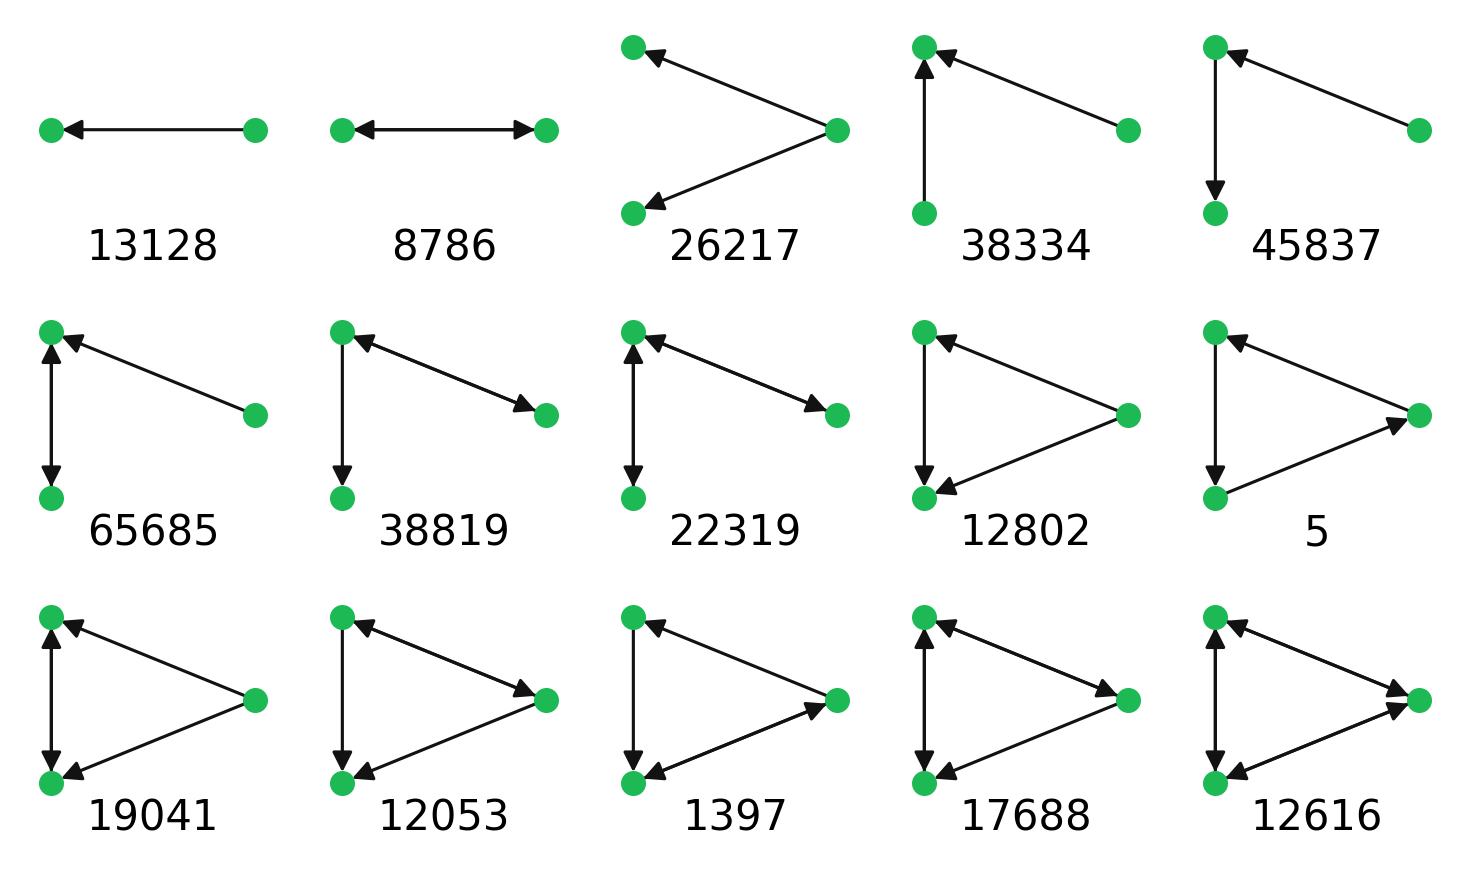

In [215]:
I = 3
J = 5
fig, axes = plt.subplots(nrows=I, ncols=J, dpi=300, figsize=(5, 3))
motifs_G = list(mapa.values())
for i in range(I):
    for j in range(J):
        ax = axes[i][j]
        g = gs[i*J+j]
        n = motifs_G[i*J+j]
        nx.draw_circular(g, ax=ax, node_size=25, node_color=green_spotify, width=0.75, edge_color=black_spotify)
        ax.annotate(n, xy=(0.5, -0.15), xycoords='axes fraction', ha="center")
fig.tight_layout()

In [249]:
i = 0
T = 0
K_all = 0
K_any = 0
total = len(all_subgraph)
for _, nodes in all_subgraph.items():
    if i%10000 == 0:
        print(f"Processing {i}/{total} graph")
    i+=1
    sg = network.subgraph(list(nodes))
    g = gs[2]
    if nx.is_isomorphic(g, sg):
        father, dg_father = max(sg.out_degree, key=lambda x: x[1])
        father_pop = int(network.nodes[father]["followers"])
        childs = list(sg.out_degree)
        childs.remove((father, dg_father))
        if all([father_pop > int(network.nodes[child]["followers"]) for child, _ in childs]):
            K_all+=1
        elif any([father_pop > int(network.nodes[child]["followers"]) for child, _ in childs]):
            K_any+=1
        T += 1

Processing 0/334727 graph
Processing 10000/334727 graph
Processing 20000/334727 graph
Processing 30000/334727 graph
Processing 40000/334727 graph
Processing 50000/334727 graph
Processing 60000/334727 graph
Processing 70000/334727 graph
Processing 80000/334727 graph
Processing 90000/334727 graph
Processing 100000/334727 graph
Processing 110000/334727 graph
Processing 120000/334727 graph
Processing 130000/334727 graph
Processing 140000/334727 graph
Processing 150000/334727 graph
Processing 160000/334727 graph
Processing 170000/334727 graph
Processing 180000/334727 graph
Processing 190000/334727 graph
Processing 200000/334727 graph
Processing 210000/334727 graph
Processing 220000/334727 graph
Processing 230000/334727 graph
Processing 240000/334727 graph
Processing 250000/334727 graph
Processing 260000/334727 graph
Processing 270000/334727 graph
Processing 280000/334727 graph
Processing 290000/334727 graph
Processing 300000/334727 graph
Processing 310000/334727 graph
Processing 320000/3347

In [245]:
K

20364

In [251]:
print("all child < father: ", K_all/T)
print("any child < father: ", (K_all+K_any)/T)

all child < father:  0.4696952359156273
any child < father:  0.7458519281382309


In [253]:
i = 0
T = 0
K_all = 0
K_any = 0
total = len(all_subgraph)
for _, nodes in all_subgraph.items():
    if i%10000 == 0:
        print(f"Processing {i}/{total} graph")
    i+=1
    sg = network.subgraph(list(nodes))
    g = gs[3]
    if nx.is_isomorphic(g, sg):
        father, dg_father = max(sg.in_degree, key=lambda x: x[1])
        father_pop = int(network.nodes[father]["popularity"])
        childs = list(sg.in_degree)
        childs.remove((father, dg_father))
        if all([father_pop > int(network.nodes[child]["popularity"]) for child, _ in childs]):
            K_all+=1
        elif any([father_pop > int(network.nodes[child]["popularity"]) for child, _ in childs]):
            K_any+=1
        T += 1

Processing 0/334727 graph
Processing 10000/334727 graph
Processing 20000/334727 graph
Processing 30000/334727 graph
Processing 40000/334727 graph
Processing 50000/334727 graph
Processing 60000/334727 graph
Processing 70000/334727 graph
Processing 80000/334727 graph
Processing 90000/334727 graph
Processing 100000/334727 graph
Processing 110000/334727 graph
Processing 120000/334727 graph
Processing 130000/334727 graph
Processing 140000/334727 graph
Processing 150000/334727 graph
Processing 160000/334727 graph
Processing 170000/334727 graph
Processing 180000/334727 graph
Processing 190000/334727 graph
Processing 200000/334727 graph
Processing 210000/334727 graph
Processing 220000/334727 graph
Processing 230000/334727 graph
Processing 240000/334727 graph
Processing 250000/334727 graph
Processing 260000/334727 graph
Processing 270000/334727 graph
Processing 280000/334727 graph
Processing 290000/334727 graph
Processing 300000/334727 graph
Processing 310000/334727 graph
Processing 320000/3347

In [254]:
print("all child < father: ", K_all/T)
print("any child < father: ", (K_all+K_any)/T)

all child < father:  0.22593520112693694
any child < father:  0.6634319403140815


# ROLES

In [313]:
_rol_map = {
    "n":0,
    "in_degree":0,
    "out_degree":0,
    "bc":0,
    "out_community_crossing":0,
    "in_community_crossing": 0
}
roles = [f"role_{x}" for x in range(8)]
roles_map = {rol:_rol_map.copy() for rol in roles}

def update_mean(mean, n, new_value):
    return (mean*n+new_value)/(n+1)
for id, info in network.nodes(data=True):
    rol = info["rol"]
    n = roles_map[rol]["n"]
    roles_map[rol]["in_degree"] = update_mean(roles_map[rol]["in_degree"], n, network.in_degree[id])
    roles_map[rol]["out_degree"] = update_mean(roles_map[rol]["out_degree"], n, network.out_degree[id])
    roles_map[rol]["bc"] = update_mean(roles_map[rol]["bc"], n, int(info["bc"]))

    crossings = 0
    for neighbor_id in network.neighbors(id):
        if info["modclass"] != network.nodes[neighbor_id]["modclass"]:
            crossings += 1
    roles_map[rol]["out_community_crossing"] = update_mean(roles_map[rol]["out_community_crossing"], n, crossings)

    crossings = 0
    for neighbor_id in network.predecessors(id):
        if info["modclass"] != network.nodes[neighbor_id]["modclass"]:
            crossings += 1
    roles_map[rol]["in_community_crossing"] = update_mean(roles_map[rol]["in_community_crossing"], n, crossings)

    roles_map[rol]["n"] += 1

In [314]:
roles_map

{'role_0': {'n': 381,
  'in_degree': 7.102362204724409,
  'out_degree': 6.769028871391076,
  'bc': 7715437929.110248,
  'out_community_crossing': 0.15485564304461946,
  'in_community_crossing': 0.1732283464566927},
 'role_1': {'n': 482,
  'in_degree': 22.699170124481334,
  'out_degree': 17.23651452282156,
  'bc': 13204160496.910769,
  'out_community_crossing': 0.1327800829875518,
  'in_community_crossing': 0.3091286307053943},
 'role_2': {'n': 547,
  'in_degree': 9.946983546617911,
  'out_degree': 10.003656307129797,
  'bc': 8179567563.658117,
  'out_community_crossing': 0.12614259597806238,
  'in_community_crossing': 0.11151736745886663},
 'role_3': {'n': 505,
  'in_degree': 9.588118811881184,
  'out_degree': 14.453465346534657,
  'bc': 10943773511.681189,
  'out_community_crossing': 0.33663366336633666,
  'in_community_crossing': 0.2059405940594058},
 'role_4': {'n': 290,
  'in_degree': 12.337931034482759,
  'out_degree': 12.848275862068963,
  'bc': 17358453922.63448,
  'out_communit